In [1]:
import numpy as np
import pypolycontain as pp
np.set_printoptions(2)

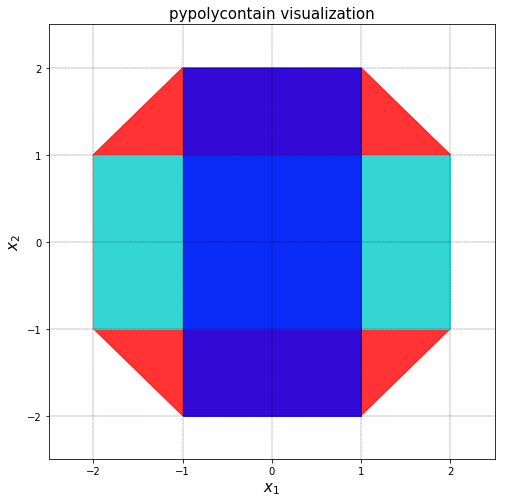

In [2]:
H=np.array([[1,1],[-1,0],[0,-1]])
h=np.array([1,0,0]).reshape(3,1)
X=pp.H_polytope(H,h)

X=pp.zonotope(x=np.array([0,0]).reshape(2,1),G=np.array([[2,0],[0,1]]),color='cyan')
Y=pp.zonotope(x=np.array([0,0]).reshape(2,1),G=np.array([[1,0],[0,2]]),color='blue')
A=pp.convex_hull(X,Y)
A.color='red'
pp.visualize([A,X,Y])

In [3]:
# Z_i=pp.zonotope(x=np.zeros((n,1)),G=G)
import pydrake.solvers.mathematicalprogram as MP
# use SOCS solver
import pydrake.solvers.scs as SCS
mysolver=SCS.ScsSolver()

success
G= [[ 1.50e+00 -1.16e-09]
 [-1.16e-09  1.50e+00]]
x= [-1.95e-10  2.50e-12]


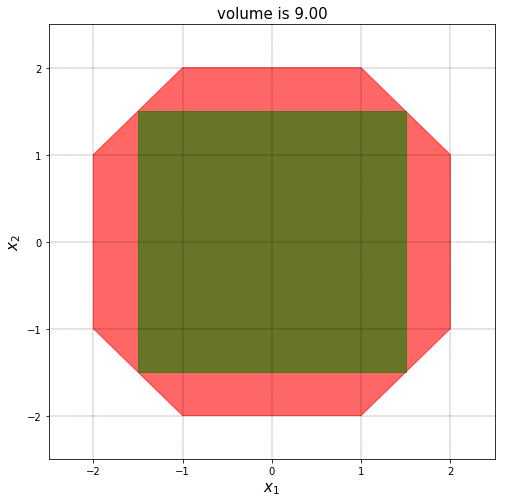

In [4]:
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(2,'G') 
x=program.NewContinuousVariables(2,1,'x')
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z=pp.zonotope(x=x,G=G) 
pp.subset(program,Z,A,k=0)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n= result.GetSolution(G)
    x_n= result.GetSolution(x)
    print("G=",G_n)
    print("x=",x_n)
else:
    print("failure") 
Z_n=pp.zonotope(x=x_n,G=G_n,color='green')
pp.visualize([A,Z_n],alpha=0.6,title=r'volume is %0.0002f'%Z_n.volume())

/home/sadra/Dropbox (MIT)/pypolycontain/pypolycontain/conversions.py:165: UserWarning: Zonotope Vertex Enumeration:                       The number of generators 1000 is very large.                       Resorting to ray shooting
  Resorting to ray shooting'%q)


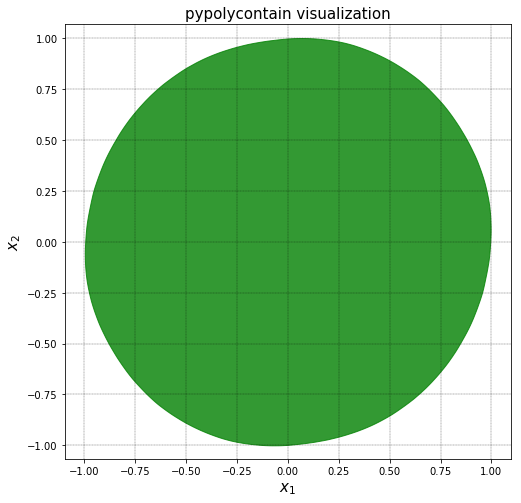

In [5]:
N=1000
x=np.random.normal(size=(2,N))
y=x/np.linalg.norm(x,2,axis=0)*np.pi/2/N
pp.visualize([pp.zonotope(y)],equal_axis=True)